In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [36]:
df = pd.read_csv('adult_data.csv')
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
def handleCapitalGain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan,0)
    

In [28]:
handleCapitalGain(df)
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
2121,20,Private,108887,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0.0,0,40,United-States,<=50K
18143,44,Private,136986,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0,60,United-States,>50K
4279,46,Private,215943,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0.0,0,40,United-States,<=50K
20244,20,Private,224424,12th,8,Never-married,Machine-op-inspct,Own-child,White,Male,0.0,0,40,United-States,<=50K
27823,53,Federal-gov,167380,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,1740,50,United-States,<=50K


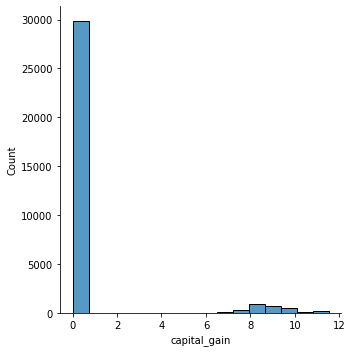

In [29]:
sns.displot(df['capital_gain'])

In [24]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.064428,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,0.214297,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,0.893419,4356.000000,99.000000


In [30]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [41]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [43]:
df['salary'] = np.where(df['salary'] == ">50K" ,1,df.salary)
df['salary'] = np.where(df['salary'] == "<=50K" ,0,df.salary)
df['salary']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

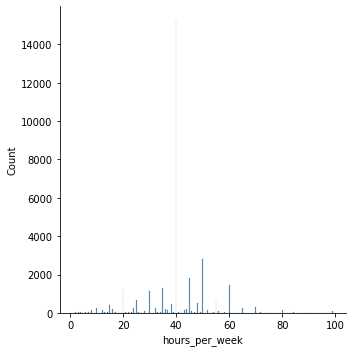

In [44]:
sns.displot(df.hours_per_week)

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

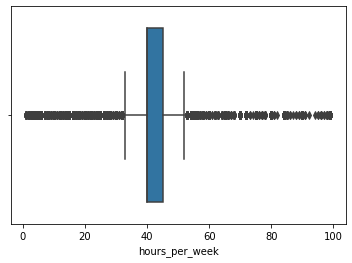

In [45]:
sns.boxplot(df.hours_per_week)

In [51]:
def remove_outliers(df,feature):
    sf = df[feature].quantile(0.75)
    tf = df[feature].quantile(0.25)
    IQR = sf-tf

    ll = tf-1.5*IQR
    ul = sf+1.5*IQR

    df[feature] = np.where(df[feature]<=ll , ll, df[feature] )
    df[feature] = np.where(df[feature]>=ul , ul, df[feature] )



In [52]:
remove_outliers(df,'hours_per_week')

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

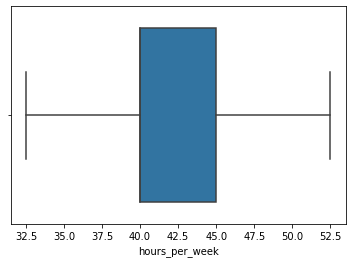

In [53]:
sns.boxplot(df.hours_per_week)

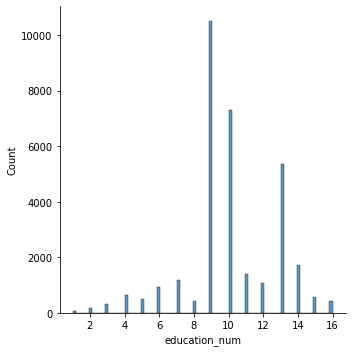

In [55]:
sns.displot(df.education_num)

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

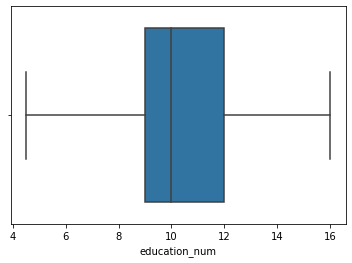

In [57]:
remove_outliers(df,'education_num')
sns.boxplot(df.education_num)